In [1]:
from tqdm import tqdm
import numpy as np
import gym

In [2]:
env = gym.make("Taxi-v3")

In [70]:
env.action_space

Discrete(6)

6 вариантов действий:

    0: move south \
    1: move north \
    2: move east \
    3: move west \
    4: pickup passenger \
    5: drop off passenger

Поле состоит из клеток 5х5 в которых может находиться такси. 5 мест, в которых может стоять пассажир. И 4 варианта мест, в которые требуется доставить пассажира. \
Всего 500 различных состояний.

Награды за действия: \
-1 за каждое перемещение, если не было других наград \
+20 за доставку пассажира \
-10 за подбор и высадку пассажира в неподходящем месте

In [3]:
nS, nA = env.env.nS, env.env.nA
nS, nA

(500, 6)

In [4]:
def get_random_Q(env):
    Q = np.zeros((nS, nA))
    return Q

def compute_policy_by_Q(env, Q):
    return np.argmax(Q, axis=1)

In [5]:
def Sarsa_learning_episode(env, pi, Q, alpha=0.05, epsilon=0.0, gamma=0.9):
    env.reset()
    s, a = env.env.s, pi[env.env.s] if np.random.rand() > epsilon else np.random.randint(nA)
    for _ in range(1000):
        observation, reward, done, info = env.step(a)
        s_prime, a_prime = env.env.s, pi[env.env.s] if np.random.rand() > epsilon else np.random.randint(nA)
        Q[s][a] = Q[s][a] + alpha * (reward + gamma * Q[s_prime][a_prime] - Q[s][a])
        s, a = s_prime, a_prime
        if done:
            break

In [63]:
total_episodes = 50000
gamma = 0.9
alpha = 0.1

Q_hist_Sarsa = [ ]

Q = get_random_Q(env)
pi = compute_policy_by_Q(env, Q)

for n in tqdm(range(1, total_episodes+1)):
    Sarsa_learning_episode(env, pi, Q, alpha=alpha, epsilon= 1. / (np.log(n)+1), gamma=gamma)
    pi = compute_policy_by_Q(env, Q)
    Q_hist_Sarsa.append(np.copy(Q))

env.close()

100%|██████████| 50000/50000 [00:14<00:00, 3503.44it/s]


In [6]:
import pickle

# with open('q_table.pkl', 'wb') as file:
    # pickle.dump(Q, file)
with open('q_table.pkl', 'rb') as file:
    Q = pickle.load(file)

In [65]:
def conduct_experiments_pi(env, pi, num_experiments=1000):
    num_steps, total_reward = [], []
    for _ in range(num_experiments):
        env.reset()
        num_steps.append(0)
        total_reward.append(0)
        for _ in range(1000):
            observation, reward, done, info = env.step(pi[env.env.s])
            total_reward[-1] += reward
            num_steps[-1] += 1
            if done:
                break
    env.close()
    return np.mean(total_reward), np.mean(num_steps)

In [7]:
env = gym.make("Taxi-v3")
env._max_episode_steps = 10000

total_episodes = 10000
gamma = 0.9

pi = compute_policy_by_Q(env, Q)
num_steps, total_reward = [], []

for _ in range(total_episodes):
    env.reset()
    num_steps.append(0)
    total_reward.append(0)
    for _ in range(1000):
        observation, reward, done, info = env.step(pi[env.env.s])
        total_reward[-1] += reward
        num_steps[-1] += 1
        if done:
            break

env.close()

Средняя награда за 10к эпизодов по обученной стратегии.

In [8]:
np.mean(total_reward)

7.8397

Well done!


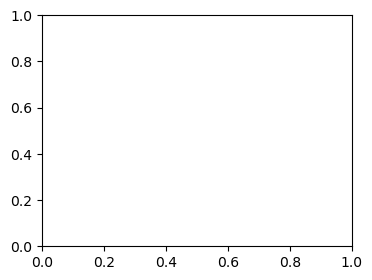

In [11]:
import matplotlib.pyplot as plt
from IPython import display
import time

plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

TIME_LIMIT = 300

obs = env.reset()
pi = compute_policy_by_Q(env, Q)

for t in range(TIME_LIMIT):
    plt.gca().clear()
    
    action = pi[env.env.s]  # Call your policy
    obs, reward, done, _ = env.step(action)  # Pass the action chosen by the policy to the environment

    # We don't do anything with reward here because MountainCar is a very simple environment,
    # and reward is a constant -1. Therefore, your goal is to end the episode as quickly as possible.

    # Draw game image on display.
    env.render()
    time.sleep(1)

    if t != TIME_LIMIT - 1:
        display.clear_output(wait=True)

    if done:
        print("Well done!")
        break
    else:
        print("Time limit exceeded. Try again.")
